Date Created: July 22, 2023  
By Tyler Reiser

# Processing Procedure

---

## Summary

---

This notebook shows how to use the provided Python code that defines a DataProcessor class designed to process WiFi Information from the campus of the University of Colorado Boulder. This class deals with multiple Wi-Fi datasets, each corresponding to a different building on the campus. The input data are stored in CSV files, and the class processes these files for future extraction of useful insights.

### Input

The Wifi Information for each building on the University of Colorado Boulder campus stored as `CSV` files.

### Data Format

The Wifi Information for each building on campus from \[2019-08-16 08:10:53\] to \[2021-05-25 06:57:08\]. The data is segmented into three folders: “UCB Wireless”, “UCB Guest”,  and “Eduroam”; each Folder contains data sets from each network . Every file is a CSV file named in the following format: \[Building Code\]_Extracted_Data_\[Start Date\]. 

Each `.csv` file contains the date and time in column zero and the active connected device count in column one. The devices recorded are connected to access points in building rooms, where most rooms have one access point and some have more than one. 

An example of file data is given below from the UCB Wireless network in Aden Hall. This first row of this example dataset would be read as “In Aden Hall, on August 16, 2019, at 8:10:53, there were eight devices connected to UCB Wireless”.

### EXAMPLE: ADEN HALL

| datetime |   devicecount  | 
| -------- |    --------    |
| 2019-08-16 08:10:53 | 8.0 |
| 2019-08-16 08:18:58 | 4.0 |
| 2019-08-16 08:28:17 | 5.0 |
| 2019-08-16 08:32:10 | 9.0 |
| 2019-08-16 08:37:38 | 6.0 |
| 2019-08-16 08:42:51 | 9.0 |
| 2019-08-16 08:47:59 | 5.0 |

### Setting Directory Paths

Store `.csv` files at `BASE_DIR/data/input/WiFiData`.

### Output

The result of the `process_all_buildings` method is a list of buildings to process (either all buildings or a specific building if `building_id` is provided), and uses the joblib's `Parallel` function to process the data for these buildings in parallel, making use of multiple CPU cores if available. The number of cores used for parallel processing is determined by the `cpu_cores` parameter passed during the initialization of the `DataProcessor` object. The method returns a dictionary where the keys are building names and the values are the processed DataFrames for each building. This design enhances performance, especially when processing large amounts of data across multiple files.

### Python

1. Create a new Python environment using `venv`. 

```bash
mkdir env
cd env
python3 -m venv env
```

2. Activate the environment.


```bash
source venv/bin/activate

```

NOTE: your command line should show (venv) before the prompt. If you have never installed `xcode` ... then use this to install Apple Command Line Tools :

```bash
xcode-select --install
```

3. Install the needed packages.

```bash
pip install -r requirements.txt
```

4. Freeze (if you need to add new packages, this saves a new `.txt`)

```bash
pip freeze > requirements.txt  
```

## The DataProcessor Class

---

- Initialization Method (`__init__`):

The `DataProcessor` class is initialized with parameters which include the directory where the CSV files are stored, the start and end dates for the data to be considered, a specific building_id if the user would like to process data for a particular building only, the number of CPU cores to utilize for the computation, the frequency at which to sample data, and a boolean to decide whether to record the total execution time.

The `DataProcessor` class used the following methods internally:

- Reading Data Method (`read_time_series_data`):

The read_time_series_data method is a static method, meaning it does not depend on the state of the DataProcessor instance. This method reads data from a CSV file and returns a DataFrame. It also converts the "datetime" column to actual datetime objects for easy handling in subsequent methods.

- Interpolating Data Method (`interpolate_time_series_data`):

The interpolate_time_series_data method implements interpolation on the provided data. This is useful to fill gaps in the dataset where data points might be missing. With the help of the pandas.date_range function, a date range object is created from the minimum date to the maximum date with a frequency set by the sample_freq attribute. The method then interpolates the missing data points and returns an updated DataFrame. The method is shown below:

- Building Identifiers Method (`_get_building_identifiers` and `_get_buildings`):

The _get_building_identifiers is a static method that retrieves the building identifiers from a given filename. It splits the filename, which has the structure "buildingID_Extracted_Data_date.csv", into a list using "_" as the delimiter and then returns the building id.

- Data Processing Method (`_process_building_data and process_all_buildings`):

The _process_building_data method processes the data for a single building. It uses the `read_time_series_data` method to read the dataset and `interpolate_time_series_data` to interpolate missing data.

The `process_all_buildings` method applies the above steps to all buildings. It first gets the list of buildings to process, either a single one if `building_id` is provided, or all buildings in the directory otherwise. Then, using joblib's Parallel and delayed functions, it processes data for all these buildings in parallel, making efficient use of multiple CPU cores if available. It returns a dictionary where keys are building names and values are DataFrames containing corresponding processed data.

If `record_time` is set True, it records and returns execution time for data processing. This is used for performance testing.

---

## Workflow

---

1. Import the class

In [8]:
from src.python.utils import *
import src.python.DataProcessor as dp

2. Create an instance of the `DataProcessor` class using the the `process_all_buildings` method

In [9]:
data_processor = dp.DataProcessor()
data = data_processor.process_all_buildings()

3. Call both columns of data for the Aerospace building like this:

In [10]:
print(data[   'AERO'  ].head())

             datetime  devicecount
0 2019-08-16 08:10:53    92.000000
1 2019-08-16 08:20:53    98.234347
2 2019-08-16 08:30:53   105.678112
3 2019-08-16 08:40:53   116.115016
4 2019-08-16 08:50:53   118.881081


4. Call the first column of data for an individual building:

In [11]:
print(data[   'ATLS'  ][  'devicecount'   ].head())

0    37.000000
1    37.000000
2    38.339056
3    37.000000
4    39.410811
Name: devicecount, dtype: float64


### Optional Parameters

The simplest use of the `DataProcessor` class is to pass no values, which is shown above. The following section demonstrates options for improving performance of the processing procedure and initialization of several parameters.

---
**Parameter List**

1. `csv_directory`: used to specify the CSV files directory.
2. `start_date` and `end_date`: the start and end dates for data processing.
3. `building_id`: a building ID for processing data related to a specific building.
4. `cpu_cores`: the number of CPU cores to use for parallel processing.
5. `sample_freq`: the time between each interpolated point.
6. `record_time=True`: performance testing only.

---


1. Set `csv_directory` based on the path to the directory with the CSV files.

In [12]:
data_processor = dp.DataProcessor( csv_directory   =   './data/input/WiFiData/'    )
data           = data_processor.process_all_buildings()

2. Set `cpu_cores` based on the available cores on your machine for optimal performance.

In [13]:
data_processor = dp.DataProcessor( cpu_cores   =   10  )
data           = data_processor.process_all_buildings()

3. Set `sample_freq` if you want to interpolate between points at an interval that is different than `10Min`.

In [14]:
data_processor = dp.DataProcessor( sample_freq =   '20Min'  )
data_frequency = data_processor.process_all_buildings()

4. Set a `start_date` and/or `end_date`.

In [15]:
start_date  = datetime( 2019, 10, 1  ) 
end_date    = datetime( 2020,  4, 1  )

data_processor  = dp.DataProcessor( start_date = start_date, end_date = end_date    )
data_range      = data_processor.process_all_buildings()

5. Set `building_id` to study a specific building in the form `ATLS`

In [16]:
data_processor  = dp.DataProcessor ( building_id =   'ATLS')
data_atlas      = data_processor.process_all_buildings()

6. `record_time=True` is only for performance testing and will not return a dictionary of data.

### Speed-Up Results

The process of data interpolation for 144 points across 77 buildings was significantly expedited by utilizing all 10 cores on a Apple M1 Pro with a 10-core processor and 32 gb of unified memory. **The time required for this operation was reduced from 5.2 seconds to 1.3 seconds**, demonstrating the efficiency of parallel processing independent CSV files. The output data remained consistent, despite the increased processing speed, and was not printed again for brevity.

This improvement in performance is a testament to the power of Data Parallelization, a straightforward strategy where each processing unit operates independently, as the memory does not depend on each other. By default, the system will utilize the maximum number of CPU cores available. However, if any issues arise, one can manually set `cpu_cores = 1` to only execute one process at a time.

To illustrate the performance gained by implementing this parallel processing stratigy, a loop was implemented to run the DataProcessor for each core, ranging from 1 to the maximum number of CPU cores. This was done for interpolation between points with each of the following sample frequencies: `['15Min','10Min','5Min','2Min','1Min']`. The total time taken for each run was recorded and plotted, providing a clear visual representation of the performance increase when using multiple CPU cores. The plot demonstrates a noticeable decrease in processing time as the number of cores increases, further emphasizing the benefits of parallel processing. 

The time is recored into a Python dictionary and converted to a Pandas DataFrame before being returned by the function.

In [17]:
# PERFORMANCE TEST LEFT OUT SINCE IT TAKES >10 MINS TO RUN
# import src.python.performance_testing as pt
# pt.measure_data_processing_speed()


# Data Visualization

This notebook shows how the `DataVisualizer` class is used. The DataVisualizer class is designed for the purpose of visualizing data, particularly focusing on building time-series data sliced into subplots. Special attention has been paid to increasing the performance of showing all data to make it easy to look for events in different areas.

---

## The DataVisualizer Class

---

- Initialization Method (`__init__`): The constructor method for the class takes three arguments: data_processor, show_plots, and intervals. data_processor is an object that processes all building data. show_plots is a boolean that determines whether to display the plots or save them as images. intervals is the number of intervals to split the data into for plotting purposes.

- Reading Method (`grab`): This method takes a building's name and an optional index range. It returns a DataFrame of the data for the specified building and for the index range if specified.

-  Filtering Method (`data_matrix`): This method takes a building's name and returns a matrix of device counts grouped by time. This will most likely be removed from this class but is left in for now.

- Plotting Method (`plot_single`): This method takes a building's name and an optional index range. It plots the device count against time for the specified building and for the index range if specified. The plot is divided into a number of intervals specified in the constructor. The method either displays the plot or saves it as an image based on the show_plots attribute.

- Parallel Data Processing Method (`plot_multiple`): This method takes an optional list of buildings and an optional index range. It plots the device count against time for all specified buildings and for the index range if specified. The method uses parallel processing to plot for each building.

> NOTE: this is set for a 10-core central processing unit and will throw errors if not run on an Apple M1 Pro

---

### Calling the Class

In [18]:
import src.python.DataVisualizer as dv

data_processor  =   dp.DataProcessor(   start_date      =   datetime(   2019, 11, 1 ), 
                                        end_date        =   datetime(   2020,  1, 7 ), 
                                        sample_freq     =    '0.2Min'
                                        )

data_visualizer =   dv.DataVisualizer(  data_processor  )

data_visualizer.plot_multiple()

/Users/tylerreiser/dev/Smart-Campus/env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



### Visualizing the Output

A list of the files in the directory:

In [19]:
files_in_directory  =   os.listdir( OUTPUT_PATH_DT_SERIES   )
image_files         =   [   file for file in files_in_directory if file.endswith((".png")) ]
df                  =   pd.DataFrame(  image_files, columns=["Image Files"]    )

print(  df.head(10) )

                Image Files
0   DLC_11-2019_01-2020.png
1  REED_11-2019_01-2020.png
2  CKRL_11-2019_01-2020.png
3   VAC_11-2019_01-2020.png
4   REC_11-2019_01-2020.png
5  ECCE_11-2019_01-2020.png
6  WLRD_11-2019_01-2020.png
7  ALUM_11-2019_01-2020.png
8  LESS_11-2019_01-2020.png
9  CASA_11-2019_01-2020.png


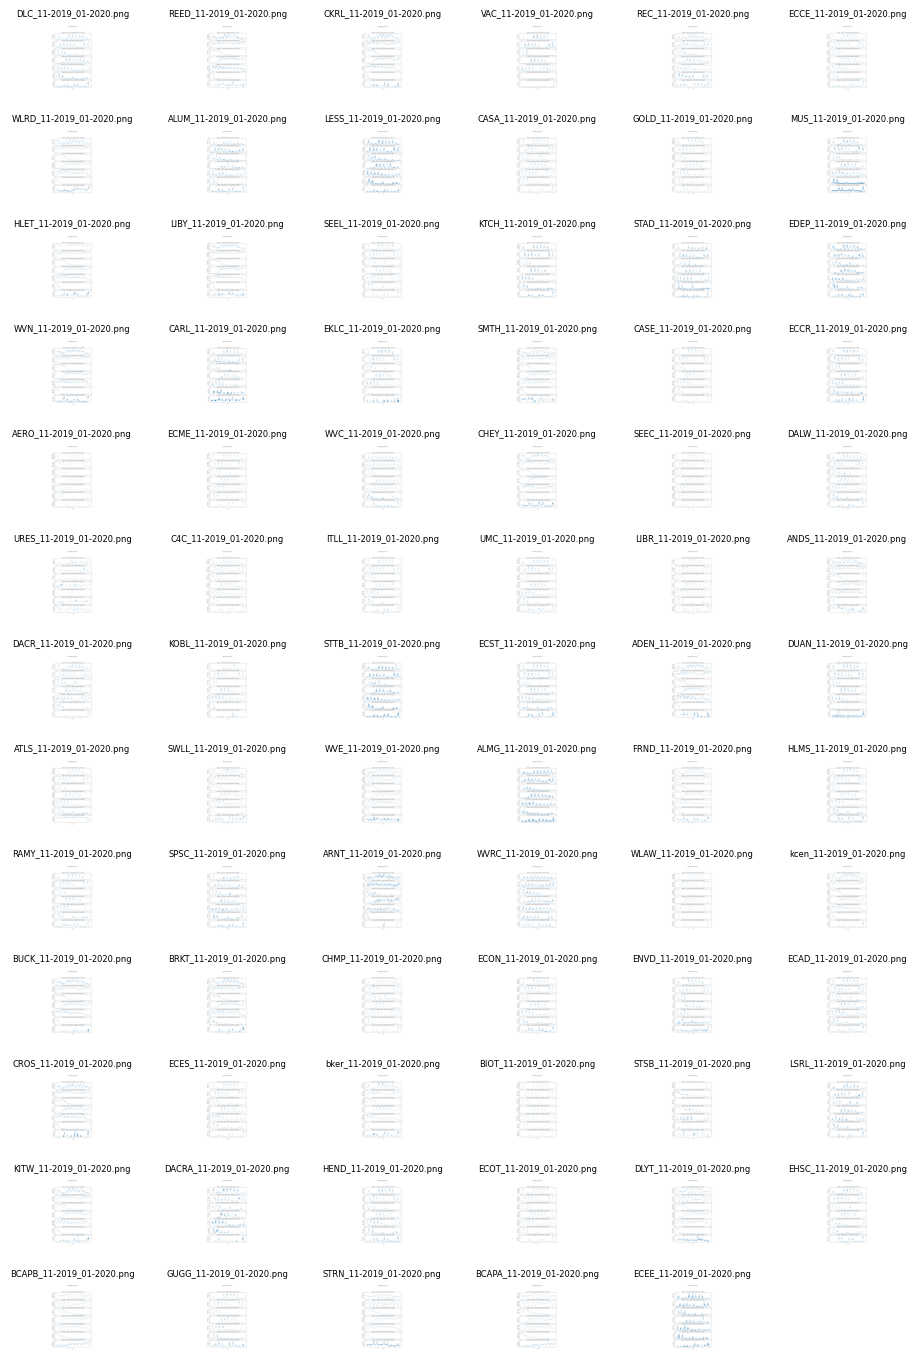

In [20]:
import src.python.plot_functions as pf

pf.display_images(  OUTPUT_PATH_DT_SERIES   )


### Interactive Viewer

An interactive window that allows you to scroll through the plots created. Use `ESC` to interupt the process while the plot window is open.

In [21]:
# pf.image_viewer(    OUTPUT_PATH_DT_SERIES   )

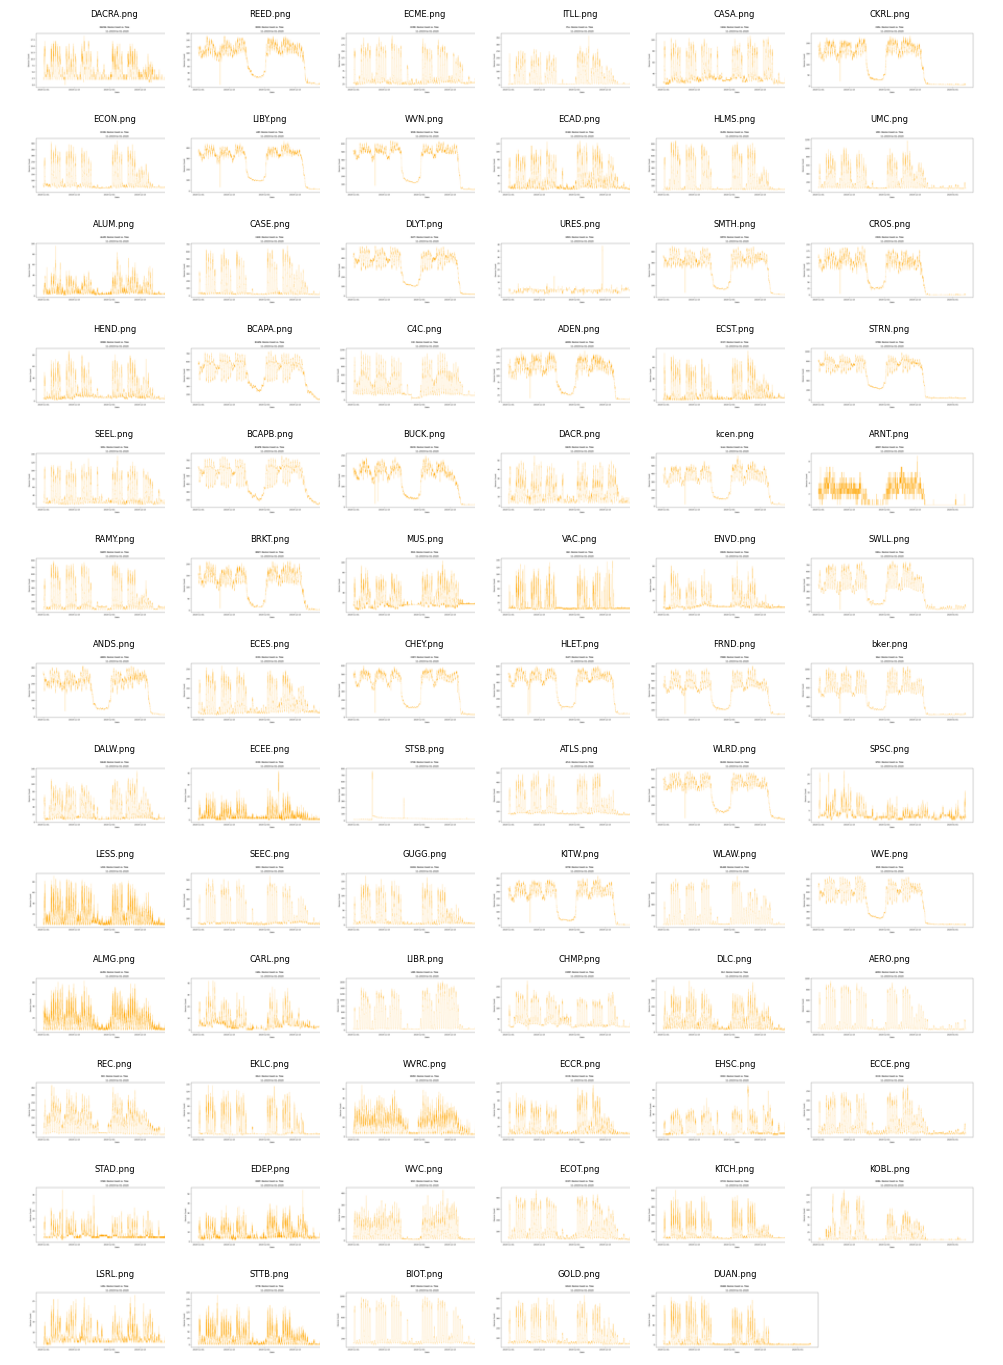

In [22]:
pf.display_images(  OUTPUT_PATH_BUILDING_FULL_TS   )

In [23]:
from src.python.utils import *
import src.python.DataProcessor as dp
import src.python.SingleVisualizer as sv

data_processor  =   dp.DataProcessor(   start_date      =   datetime(   2019, 11, 1 ), 
                                        end_date        =   datetime(   2020,  1, 7 ), 
                                        sample_freq     =    '0.2Min'
                                        )

data_visualizer =   sv.SingleVisualizer(  data_processor  )

data_visualizer.plot_multiple()

/Users/tylerreiser/dev/Smart-Campus/env/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [24]:
files_in_directory  =   os.listdir( OUTPUT_PATH )
image_files         =   [   file for file in files_in_directory if file.endswith((".png")) ]
df                  =   pd.DataFrame(  image_files, columns=["Image Files"]    )

print(  df.head(10) )

  Image Files
0   DACRA.png
1    REED.png
2    ECME.png
3    ITLL.png
4    CASA.png
5    CKRL.png
6    ECON.png
7    LIBY.png
8     WVN.png
9    ECAD.png


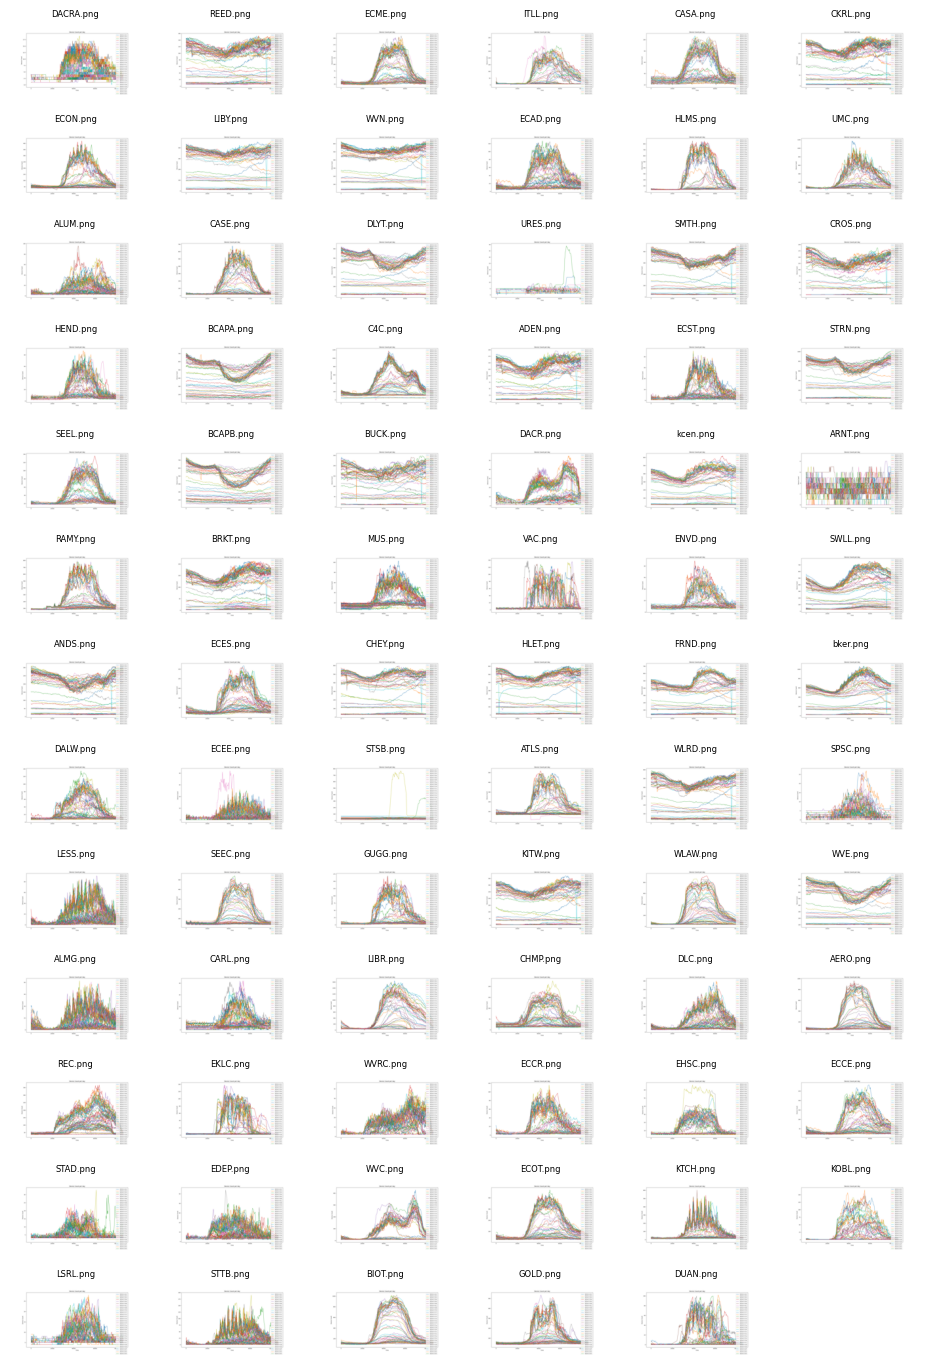

In [25]:
pf.display_images(  OUTPUT_PATH  )
# pf.image_viewer(    OUTPUT_PATH  )